In [1]:
import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## Parameters
seed = 111
tf.random.set_seed(seed)
n_epochs = 2
batch_size = 512

In [3]:
## Dataset
import cifar10
from tf_modules import tf_dataloader

train_data, test_data = cifar10.load_data()
train_data, valid_data = cifar10.split_data(train_data, split_ratio=0.8)
classes = cifar10.load_classes()

train_loader = tf_dataloader(train_data, batch_size, training=True)
valid_loader = tf_dataloader(valid_data, batch_size, training=False)
test_loader  = tf_dataloader(test_data,  batch_size, training=False)

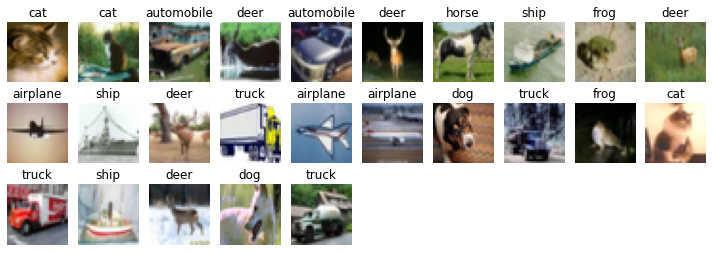

In [42]:
import matplotlib.pyplot as plt

def plot_images(images, labels, pred=None, classes=None, n_cols=10, width=10):
    n_rows = images.shape[0] // n_cols + (1 if images.shape[0] % n_cols else 0)
    height = 1.2 * width * n_rows / n_cols
    if classes is None:
        classes = range(10)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(width, height))
    for i, ax in enumerate(axes.flat):
        if i < images.shape[0]:
            ax.imshow(images[i], cmap='gray_r')
            if pred is None:
                ax.set_title("%s" % classes[labels[i]])
            else:
                ax.set_title("%s -> %d" % (classes[labels[i]], classes[pred[i]]))
        ax.set_axis_off()
    fig.tight_layout()
    plt.show()

x, y = train_data
images, labels = x[:25], y[:25]

plot_images(images, labels, classes=classes)


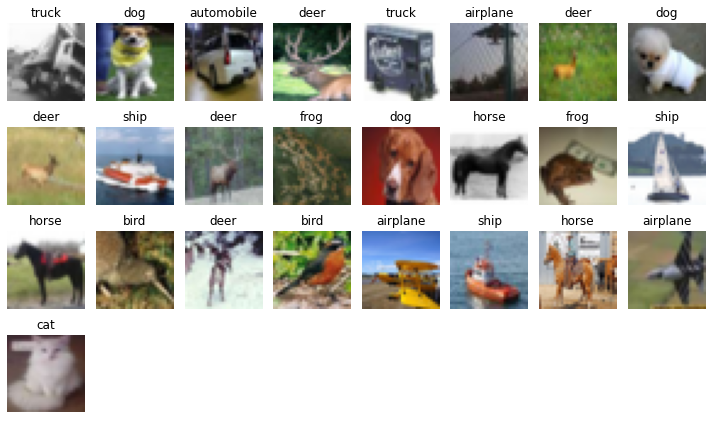

In [47]:
x, y = next(iter(train_loader))
images, labels = x[:25], y[:25]

plot_images(images, labels, classes=classes, n_cols=8)